In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import keras
from sklearn import linear_model 
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

Using TensorFlow backend.
C:\Users\Louis\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Louis\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Louis\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Louis\anaconda3\e

Open and look at the data

In [2]:
stock_data = pd.read_csv("Tesla.csv - Tesla.csv.csv")
stock_data.Date = pd.to_datetime(stock_data.Date)
stock_data.info()
stock_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


plot the data

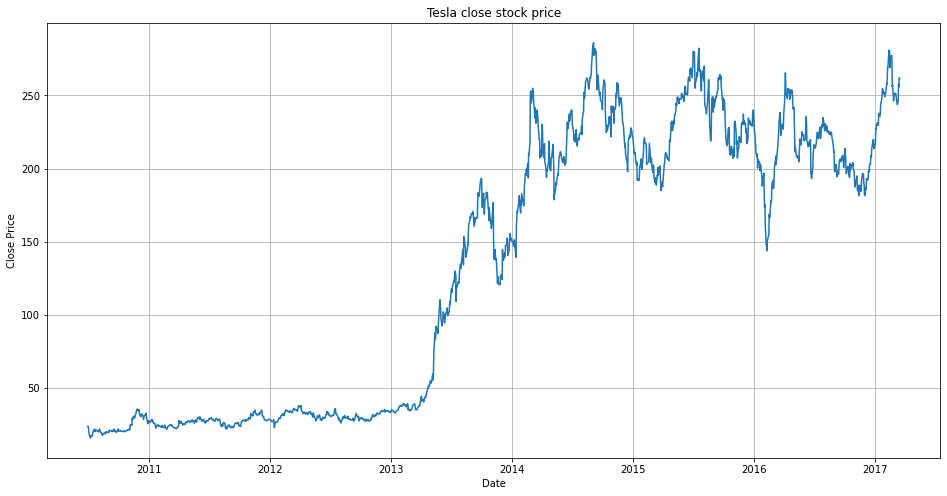

In [3]:
plt.figure(figsize=(16,8))
plt.plot(stock_data["Date"], stock_data["Close"])
plt.grid()
plt.title("Tesla close stock price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

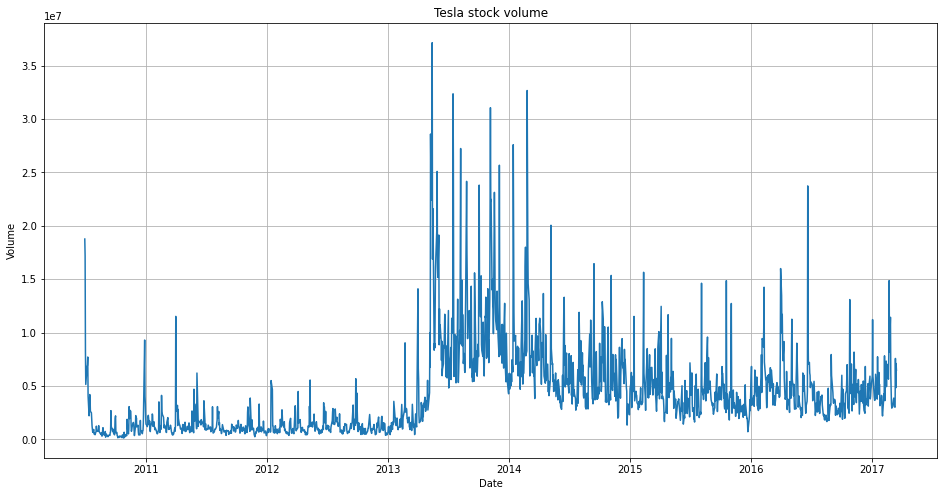

In [4]:
plt.figure(figsize=(16,8))
plt.plot(stock_data["Date"], stock_data["Volume"])
plt.grid()
plt.title("Tesla stock volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

I'll do a prediction of close price. Normalise the data using MinMaxScaler() and check the tables afterwards

In [5]:
normaliser = MinMaxScaler()
stock_data["Close_norm"] = normaliser.fit_transform(stock_data[["Close"]])
stock_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Close_norm
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999,0.029936
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000,0.029714
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999,0.022795
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001,0.012581
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001,0.001147


Isolate the data to only the noramlised closed values, then find the length of 80% of the data (training data)

In [6]:
close_data = stock_data.filter(['Close_norm'])
close_data = close_data.values
close_data_len = math.ceil(len(close_data)*.8) 

Let's create the training and test data seperation; 60 is the look-back value, and the data needs to be reshaped to 3 dimensions for the LSTM model 

In [7]:
train_data = close_data[0:close_data_len, :]

x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [8]:
test_data = close_data[close_data_len-60:, :]

x_test = []
y_test = close_data[close_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

The model; only used a low number for batch_size and epochs for quickness 

In [9]:
model = Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(60,1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, batch_size=1, epochs=10)


Epoch 1/10
1294/1294 [==============================] - 35s 27ms/step - loss: 0.0032
Epoch 2/10
1294/1294 [==============================] - 35s 27ms/step - loss: 0.0015
Epoch 3/10
1294/1294 [==============================] - 35s 27ms/step - loss: 0.0010
Epoch 4/10
1294/1294 [==============================] - 35s 27ms/step - loss: 7.6994e-04
Epoch 5/10
1294/1294 [==============================] - 35s 27ms/step - loss: 7.0947e-04
Epoch 6/10
1294/1294 [==============================] - 35s 27ms/step - loss: 6.1289e-04
Epoch 7/10
1294/1294 [==============================] - 35s 27ms/step - loss: 6.6423e-04
Epoch 8/10
1294/1294 [==============================] - 35s 27ms/step - loss: 5.2393e-04
Epoch 9/10
1294/1294 [==============================] - 35s 27ms/step - loss: 5.6546e-04
Epoch 10/10
1294/1294 [==============================] - 35s 27ms/step - loss: 5.3660e-04 0s - loss


Finding the root of the mean square error for an accuracy test

In [10]:
pred = model.predict(x_test)
pred = normaliser.inverse_transform(pred)
rmse = math.sqrt(mean_squared_error(y_test, pred))
rmse

208.46653092220743

Splitting training and validation data; plotting the model & data with a legend.  

C:\Users\Louis\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


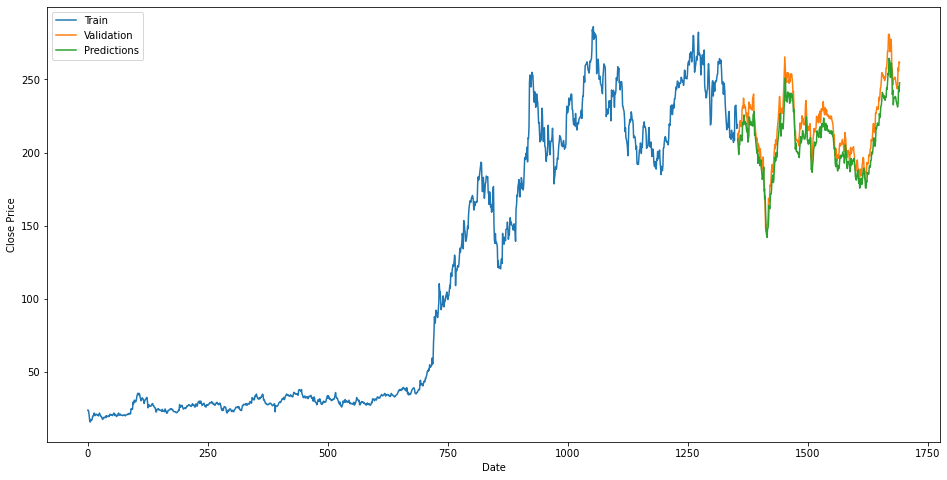

In [11]:
train = stock_data[:close_data_len]
val = stock_data[close_data_len:]
val["Predictions"] = pred


plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(train["Close"])
plt.plot(val[["Close","Predictions"]])
plt.legend(["Train","Validation","Predictions"], loc="upper left")

Prediction seems to be very close to the actual trend, and therefore was a good model. Perhaps it would be more accurate with a larger batch size and many more epochs. Other techiques like window training may be more ideal too. 